# 1. Aykırı Gözlem Analizi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from warnings import filterwarnings
filterwarnings("ignore")

## 1.1. Aykırı Değerleri Yakalamak

In [2]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"]) # Sadece sayısal değerleri alıyoruz.
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


* Tek bir değişken üzerinden aykırı gözlem yakalıyoruz.

In [3]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

* **Seaborn** kütüphanesi içerisinden boxplot grafiği ile bakalım.

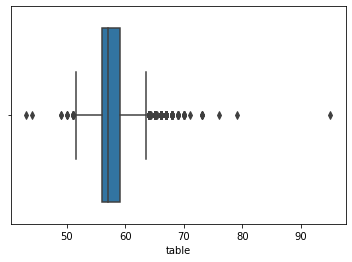

In [4]:
sns.boxplot(x = df_table);

* Eksik değerleri belirlememiz gerekiyor.
* Boxplot ile bakıyoruz.

In [5]:
Q1 = df_table.quantile(0.25) # Küçükten büyüğe sıralandığı zaman %25'e denk gelen gözlemi alacak.
Q3 = df_table.quantile(0.75) # Küçükten büyüğe sıralandığı zaman %75'e denk gelen gözlemi alacak.
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

56.0
59.0
3.0


In [6]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

print(alt_sinir)
print(ust_sinir)

51.5
63.5


* Aykırı değer ise **TRUE**

In [7]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

* Gerçek değerlerine bakıyoruz.

In [8]:
aykiri_tf = (df_table < alt_sinir)
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [9]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## 1.2. Aykırı Değer Problemini Çözmek

### 1.2.1. Silmek

In [10]:
df_table = pd.DataFrame(df_table)
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [11]:
df_table.shape

(53940, 1)

* Aykırı olmayan değerlere erişmeye çalışalım.
* **~** koymamızın sebebi koşulu sağlammayanları almak içindir.

In [12]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]
t_df.head()

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [13]:
t_df.shape

(53335, 1)

### 1.2.2. Ortalama ile Doldurmak

In [14]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [16]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

* Aykırı değerleri yakalayalım ve alt sınıra göre kaydedelim.

In [17]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [18]:
df_table.mean()

57.45718390804603

In [19]:
df_table[aykiri_tf] = df_table.mean()
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### 1.2.3. Baskılama Yöntemi
* Alt ve üst sınırlara yaklaştırmak.

In [20]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [21]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [22]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [23]:
df_table[aykiri_tf] = alt_sinir
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# 2. Çok Değişkenli Aykırı Gözlem Analizi

## 2.1. Local Outlier Factor

* Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.
* Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor.
* Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşuşlarından daha seyrek bir bölgededir yorumu yapılır.
* Dolayısıyla burada bir komşuluk yapısı söz konusudur.
* Bir değerin çevresi yoğun değilse demek ki bu değer aykırı bir değerdir şeklinde değerlendiriliyor.

In [24]:
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include = ["float64","int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


* LOC kullanarak skorlama işlemi gerçekleştireceğiz.
* **n_neighbors:** Komşuluk
* **contamination:** Yoğunluk

In [25]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [26]:
df_scores = clf.negative_outlier_factor_
df_scores[0:10] # np array'i oldugu için böyle bakıyoruz

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

* Sıralı halde bakalım.

In [27]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

* Mesela 13. değeri eşik değer olarak belirleyelim ve onun aşağısında kalanlar aykırı değer olsun.

In [28]:
esik_deger = np.sort(df_scores)[13]
esik_deger

-3.823787967755565

In [29]:
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

## 2.2. Silme Yöntemi

In [30]:
yeni_df = df[df_scores > esik_deger]
yeni_df # aykırı olmayan değerler

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [31]:
df[df_scores < esik_deger] # aykırı değerler

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [32]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


## 2.3. Baskılama

In [33]:
baski_deger = df[df_scores == esik_deger]
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [34]:
aykirilar = df[~aykiri_tf] # ~ koşulu sağlamayanları almak için
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


* Indexlerden kurtulalım.

In [35]:
res = aykirilar.to_records(index = False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

* **res[:]** Res değerlerinin tümünü seçer.
* Reslerin yerine baskı değeri (eşik değer) yerleştiriyoruz.

In [36]:
res[:] = baski_deger.to_records(index = False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

* Orjinal datada değişiklik yok.

In [37]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


* Yeni değerleri data içerisine yerleştirmemiz gerekiyor.
* Oluşturmuş olduğumu array'i dataFrame'e çevireceğiz.
* Data içerisindeki değerlerin yerine atayacağız.

In [38]:
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
